In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = pd.read_csv('car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [6]:
data.Year.nunique()

8

In [7]:
data.Price.nunique()

35

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [9]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [10]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


<AxesSubplot: >

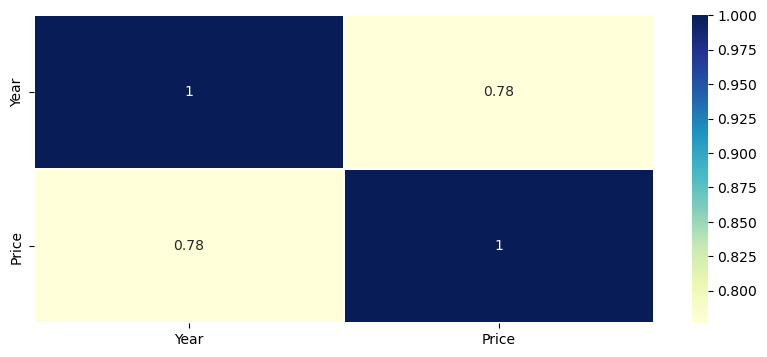

In [31]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, annot=True, linewidth=0.3,cmap='YlGnBu')

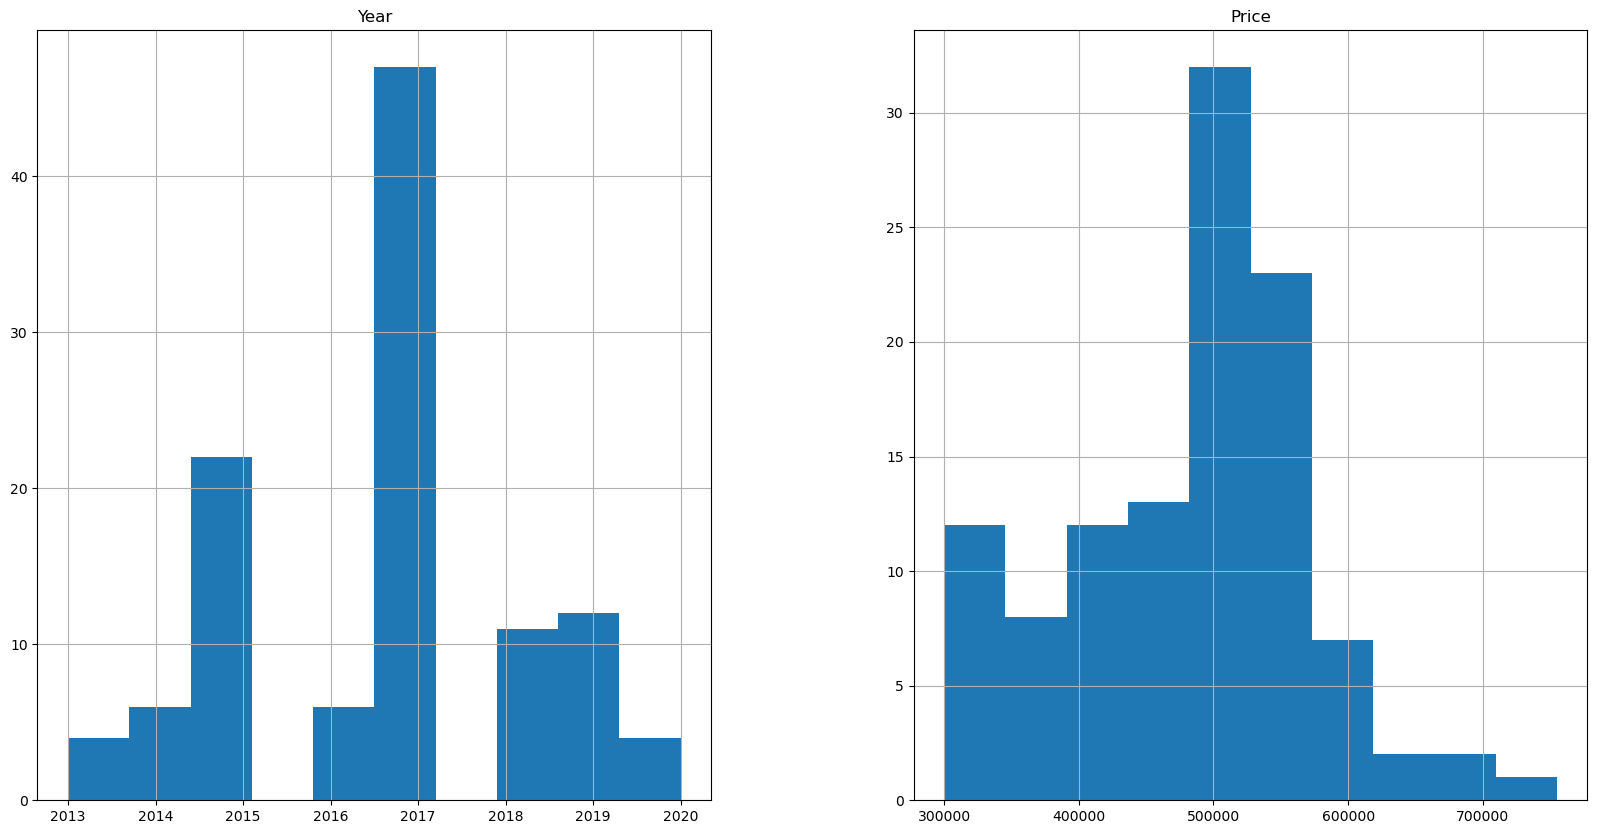

In [12]:
freqgraph = data.select_dtypes(include=['int64'])
freqgraph.hist(figsize=(20,10))
plt.show()

In [44]:
y = data['Price']
x = data.drop(['Price'],axis=1)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [46]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [69]:
y_pred

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
print('MSE is : ',mean_squared_error(y_test,y_pred))
print('R2 is : ',r2_score(y_test,y_pred))

MSE is :  4326906256.829671
R2 is :  0.36759313425902185


In [48]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [53]:
x22 = pd.DataFrame([2022])
y_lr = model.predict(x22)
y_lr

C:\Users\sobhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

### Lasso regression

In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01)
model1 = lasso.fit(x_train, y_train)

pred_y = lasso.predict(x_test)
lasso.fit(x_train, y_train)
print('MSE is : ',mean_squared_error(y_test,pred_y))
print('R2 is : ',r2_score(y_test,pred_y))

MSE is :  4326905791.966492
R2 is :  0.3675932022019466


In [40]:
pred_y

array([600775.90247035, 505558.77509837, 553167.33878435, 553167.33878435,
       553167.33878435, 410341.64772639, 505558.77509837, 553167.33878435,
       600775.90247035, 600775.90247035, 315124.52035441, 505558.77509837,
       410341.64772639, 648384.46615633, 553167.33878435, 600775.90247035,
       315124.52035441, 410341.64772639, 505558.77509837, 505558.77509837,
       505558.77509837, 505558.77509837, 505558.77509837])

In [41]:
model1 = Lasso(alpha=1.0)

row = [2022]
y_las = lasso.predict([row])
print('Predicted: ',yhat)

Predicted:  [743601.59352832]


C:\Users\sobhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
